In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

Automatically created module for IPython interactive environment


In [4]:
nested_scores

array([0.94683499, 0.94683499, 0.97297297, 0.9601707 , 0.95999289,
       0.96692745, 0.97332859, 0.9601707 , 0.96034851, 0.96639403,
       0.9601707 , 0.96674964, 0.95999289, 0.97332859, 0.96674964,
       0.96639403, 0.9735064 , 0.95999289, 0.96639403, 0.9735064 ,
       0.95963727, 0.98684211, 0.95359175, 0.97332859, 0.97332859,
       0.95359175, 0.95981508, 0.98008535, 0.98008535, 0.98008535])

In [3]:
non_nested_scores 

array([0.96034851, 0.95999289, 0.97297297, 0.96674964, 0.9735064 ,
       0.98008535, 0.97332859, 0.97332859, 0.9735064 , 0.97315078,
       0.98026316, 0.96692745, 0.9735064 , 0.98008535, 0.98008535,
       0.97332859, 0.9735064 , 0.97332859, 0.97315078, 0.98008535,
       0.97990754, 0.98684211, 0.96034851, 0.96674964, 0.97332859,
       0.98008535, 0.96657183, 0.98008535, 0.97332859, 0.98008535])

In [11]:
import seaborn as sns
import pandas as pd

In [12]:
result = pd.DataFrame({'nested': nested_scores, 'non_nested_scores': non_nested_scores, 'trail': list(range(30))})

In [15]:
plot_df = result.melt(id_vars=['trail'], value_vars = ['nested', 'non_nested_scores'],var_name='cv_type',value_name='scores')

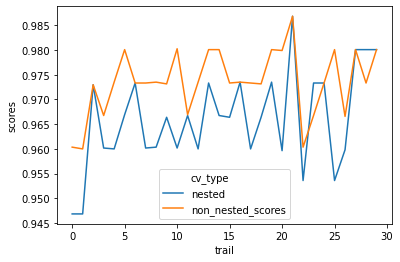

In [18]:
sns.lineplot(x='trail', y='scores', hue='cv_type', data=plot_df)